In [1]:
import pandas as pd

In [2]:
comments = pd.read_csv("udemy_courses/Comments.csv")

In [9]:
comments.head()

,id,course_id,rate,date,display_name,comment
0,88962892,3173036,1.0,2021-06-29T18:54:25-07:00,Rahul,I think a beginner needs more than you think.\...
1,125535470,4913148,5.0,2022-10-07T11:17:41-07:00,Marlo,Aviva is such a natural teacher and healer/hea...
2,68767147,3178386,3.5,2020-10-19T06:35:37-07:00,Yamila Andrea,Muy buena la introducción para entender la bas...
3,125029758,3175814,5.0,2022-09-30T21:13:49-07:00,Jacqueline,This course is the best on Udemy. This breakd...
4,76584052,3174896,4.5,2021-01-30T08:45:11-08:00,Anthony,I found this course very helpful. It was full ...


There are plenty of character sequences that indicates the empty comment such as ".", "?", ",", "-", ":)", "..", "...", "???", .... etc. 

These characters are the obstacles in front of the language detector. When it sees these characters, it gives an error.

In [11]:
comment_1 = comments[comments["rate"] <= 1]
comment_2 = comments[(comments["rate"] > 1) & (comments["rate"] <= 2)]
comment_3 = comments[(comments["rate"] > 2) & (comments["rate"] <= 3)]
comment_4 = comments[(comments["rate"] > 3) & (comments["rate"] <= 4)]
comment_5 = comments[comments["rate"] > 4]

In [12]:
rate_1 = len(comment_1) / len(comments)*100
rate_2 = len(comment_2) / len(comments)*100
rate_3 = len(comment_3) / len(comments)*100
rate_4 = len(comment_4) / len(comments)*100
rate_5 = len(comment_5) / len(comments)*100

In [13]:
print(f"Percentage of comments rated below 1.0 is {rate_1}")
print(f"Percentage of comments rated above 1.0 and below 2.0 is {rate_2}")
print(f"Percentage of comments rated above 2.0 and below 3.0 is {rate_3}")
print(f"Percentage of comments rated above 3.0 and below 4.0 is {rate_4}")
print(f"Percentage of comments rated above 4.0 is {rate_5}")

Percentage of comments rated below 1.0 is 1.9963392478341118
Percentage of comments rated above 1.0 and below 2.0 is 1.605645807618517
Percentage of comments rated above 2.0 and below 3.0 is 5.4198129631256835
Percentage of comments rated above 3.0 and below 4.0 is 16.539791262538746
Percentage of comments rated above 4.0 is 74.43841071888293


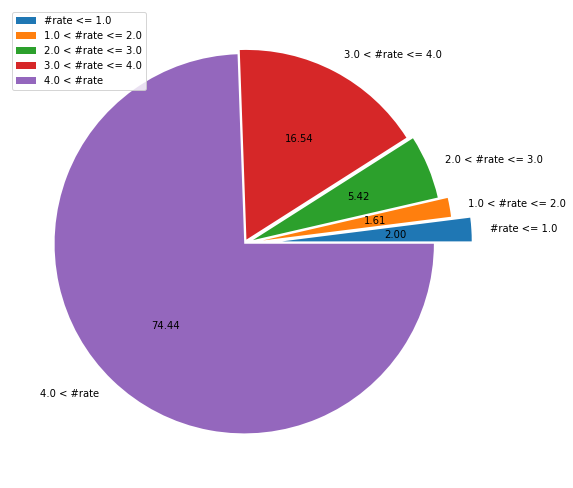

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
data = [rate_1, rate_2, rate_3, rate_4, rate_5]
labels = ["#rate <= 1.0", "1.0 < #rate <= 2.0", "2.0 < #rate <= 3.0", "3.0 < #rate <= 4.0", "4.0 < #rate"]
plt.pie(data, labels=labels, autopct='%.2f', explode=[0.2,0.1,0.05,0.025,0])
plt.tight_layout()
plt.legend()

For the sake of convenience, we will choose 3000 comments of each rating interval.

In [167]:
comment_1_sample = comment_1.sample(5000, random_state=1).dropna()
comment_2_sample = comment_2.sample(5000, random_state=1).dropna()
comment_3_sample = comment_3.sample(5000, random_state=1).dropna()
comment_4_sample = comment_4.sample(5000, random_state=1).dropna()
comment_5_sample = comment_5.sample(5000, random_state=1).dropna()

In [168]:
comment_1_sample.head()

,id,course_id,rate,date,display_name,comment
677568,76904362,124862,1.0,2021-02-03T06:02:58-08:00,Prathamesh,worst
2844211,73905032,3016360,1.0,2020-12-29T23:42:18-08:00,Amit Kumar,Not a good teacher
8102772,116787574,1506888,1.0,2022-06-20T02:23:29-07:00,Deepak,dont waste your money
1907760,44653686,2531702,1.0,2020-01-30T03:27:19-08:00,Dear,offensive course. ?
350195,6514276,967674,0.5,2017-04-18T15:36:01-07:00,Mathew S,SwiftyStoreKit is already a clean lightweight ...


In [169]:
def short_comments_detect(df):
    short_coms_idx = []
    for i in range(len(df["comment"])):
        if len(df["comment"].values[i]) < 20:
            short_coms_idx.append(df["comment"].index[i])
    return short_coms_idx

In [170]:
def delete_short_coms(df, idx):
    new_df = df.drop(idx)
    return new_df

In [171]:
def auto_process_1(df):
    short_coms = short_comments_detect(df)
    long_coms = delete_short_coms(df, short_coms)
    return long_coms

In [172]:
sample_1_long = auto_process_1(comment_1_sample)
sample_2_long = auto_process_1(comment_2_sample)
sample_3_long = auto_process_1(comment_3_sample)
sample_4_long = auto_process_1(comment_4_sample)
sample_5_long = auto_process_1(comment_5_sample)

At this step, we will filter out the comments which has not written in english.

In [173]:
!pip install langdetect

In [174]:
from langdetect import detect

In [175]:
def foreign_comments_detect(df):
    foreign_idx = []
    for i in range(len(df["comment"])):
        comment = df["comment"].values[i]
        if detect(comment) != "en":
            foreign_idx.append(df["comment"].index[i])
    return foreign_idx

In [176]:
foreign_1 = foreign_comments_detect(sample_1_long)
foreign_2 = foreign_comments_detect(sample_2_long)
foreign_3 = foreign_comments_detect(sample_3_long)
foreign_4 = foreign_comments_detect(sample_4_long)
foreign_5 = foreign_comments_detect(sample_5_long)

In [177]:
sample_1_long.loc[foreign_1].head()

,id,course_id,rate,date,display_name,comment
3650519,96722050,1996964,1.0,2021-09-29T16:04:32-07:00,William Alexander,"No muestra nada nuevo de VB.NET, utiliza progr..."
1914910,48817558,1152028,1.0,2020-03-29T20:10:21-07:00,Scarlet,Publicidad engañosa desactualizado dice que e...
1170625,47353196,2006722,1.0,2020-03-15T12:20:26-07:00,Onur,ne yaptığını nerede ise anlatmıyor yapıp geçiyor
996714,116931536,3659640,1.0,2022-06-21T14:13:17-07:00,Mauricio lobianco,só apresentou as guias e comandos que qq um qu...
2346256,61841902,1777698,1.0,2020-07-21T11:09:34-07:00,Jorge Arturo,"Falta de actualizacion, ya no coincide con lo ..."


In [178]:
def auto_process_2(df, foreigners):
    new_df = df.drop(foreigners)
    return new_df

In [179]:
sample_1_english = auto_process_2(sample_1_long, foreign_1)
sample_2_english = auto_process_2(sample_2_long, foreign_2)
sample_3_english = auto_process_2(sample_3_long, foreign_3)
sample_4_english = auto_process_2(sample_4_long, foreign_4)
sample_5_english = auto_process_2(sample_5_long, foreign_5)

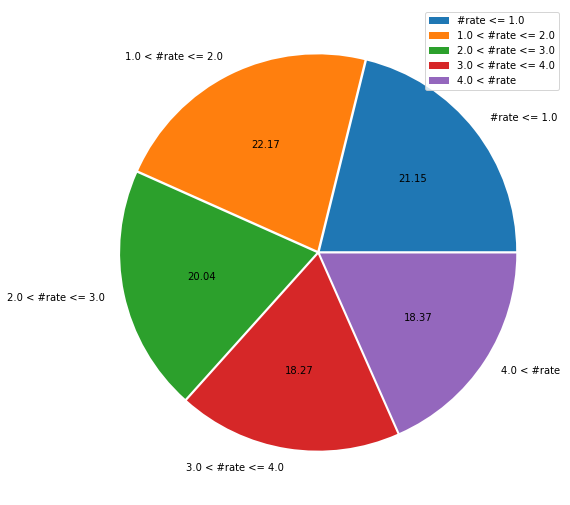

In [188]:
plt.figure(figsize = (8,8))
data = [len(sample_1_english), len(sample_2_english), len(sample_3_english), len(sample_4_english), len(sample_5_english)]
labels = ["#rate <= 1.0", "1.0 < #rate <= 2.0", "2.0 < #rate <= 3.0", "3.0 < #rate <= 4.0", "4.0 < #rate"]
plt.pie(data, labels=labels, autopct='%.2f', explode=[0.01,0.01,0.01,0.01,0.01])
plt.tight_layout()
plt.legend()

More balanced

In [192]:
sample_1_english

,id,course_id,rate,date,display_name,comment
8102772,116787574,1506888,1.0,2022-06-20T02:23:29-07:00,Deepak,dont waste your money
350195,6514276,967674,0.5,2017-04-18T15:36:01-07:00,Mathew S,SwiftyStoreKit is already a clean lightweight ...
2953887,107389666,1743328,1.0,2022-02-12T18:56:45-08:00,Nicco,It's not dynamic.... and it's not for beginners
4321094,2419452,21323,0.5,2016-06-08T09:19:47-07:00,Rob,Starts with showing how to install Python 2 an...
5824927,54359848,131416,1.0,2020-05-09T07:47:56-07:00,RickyC,Provide almost no practical advice on nothing....
...,...,...,...,...,...,...
8005053,19011262,383576,1.0,2018-07-25T21:03:34-07:00,Hantzel,"I hate to put it like this, but save your mone..."
745350,7886722,315724,0.5,2017-07-02T00:44:48-07:00,Turgaygncr,The author is really really bad.
2251756,38375390,1801874,1.0,2019-10-05T16:27:05-07:00,Loren,At least the first exam is flawed in it's func...
2524291,43848414,1989682,1.0,2020-01-16T20:20:06-08:00,Rajesh,"Awful, not what I expected at all"


In [204]:
sample_1_english[["comment", "rate"]]

,comment,rate
8102772,dont waste your money,1.0
350195,SwiftyStoreKit is already a clean lightweight ...,0.5
2953887,It's not dynamic.... and it's not for beginners,1.0
4321094,Starts with showing how to install Python 2 an...,0.5
5824927,Provide almost no practical advice on nothing....,1.0
...,...,...
8005053,"I hate to put it like this, but save your mone...",1.0
745350,The author is really really bad.,0.5
2251756,At least the first exam is flawed in it's func...,1.0
2524291,"Awful, not what I expected at all",1.0


In [210]:
all_comments = pd.concat([sample_1_english[["comment", "rate"]], 
                          sample_2_english[["comment", "rate"]],
                          sample_3_english[["comment", "rate"]],
                          sample_4_english[["comment", "rate"]],
                          sample_5_english[["comment", "rate"]]])
all_comments.head()

,comment,rate
8102772,dont waste your money,1.0
350195,SwiftyStoreKit is already a clean lightweight ...,0.5
2953887,It's not dynamic.... and it's not for beginners,1.0
4321094,Starts with showing how to install Python 2 an...,0.5
5824927,Provide almost no practical advice on nothing....,1.0


In [211]:
len(all_comments)

14862

In [208]:
len(sample_1_english)+len(sample_2_english)+len(sample_3_english)+len(sample_4_english)+len(sample_5_english)

14862

In [215]:
comments_shuffled = all_comments.sample(frac=1, random_state=1).reset_index().drop(["index"], axis=1)

In [216]:
comments_shuffled.head(10)

,comment,rate
0,I think the course is good for someone who doe...,1.5
1,This is easy to follow along but nothing is ex...,1.0
2,I come from a background of public speaking an...,4.0
3,"Nothing new to know compared to the word ""Adva...",1.0
4,Lectures are not updated. Many things changed ...,2.0
5,the presenter kept your attention wasn't boring,5.0
6,I am primarily interested in going into a reta...,2.5
7,Need more detailson virtual address details fo...,3.0
8,Sometimes if feels frustrating to hear a lectu...,1.0
9,Course material was slim at best and there is ...,1.5
